<a href="https://colab.research.google.com/github/pongsapaks/Data-science/blob/main/Book_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data, Normalization and EDA

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn.over_sampling
import scipy.stats

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

df = pd.read_csv('https://raw.githubusercontent.com/pongsapaks/Data-science/main/log2.csv')  

# Split the dataset into features (X) and target variable (y)
X = df.drop(['Action'], axis=1)
y = df['Action']

In [2]:
#data with no EDA
X_trainBasic, X_testBasic, y_trainBasic, y_testBasic = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=42)

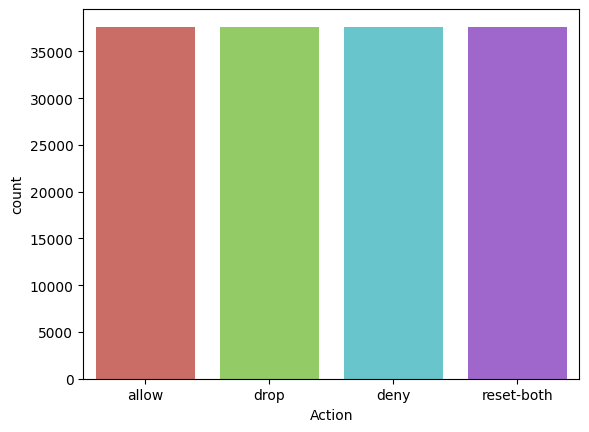

In [3]:
# Apply SMOTE (regular, svm)
sm = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = sm.fit_resample(X, y)

pca = PCA(n_components=4)
X_res_vis = pca.fit_transform(X_resampled)
sns.countplot(x=y_resampled,data=df,palette='hls')
plt.show()

In [4]:
#Check Shapiro test (Normal distribution)
scipy.stats.shapiro(X_resampled)

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.0008409619331359863, pvalue=0.0)

In [5]:
#Normalization
x_normal= (X_resampled - np.min(X_resampled)) / (np.max(X_resampled) / np.min(X_resampled)).values
x_normal

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.0,0.0,0.0,0.0,5.530350e-06,2.150816e-06,0.0,9.651429e-07,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,2.225375e-04,9.741931e-05,0.0,1.737257e-05,0.0,0.000012,0.0
2,0.0,0.0,0.0,0.0,8.413695e-06,3.669039e-06,0.0,9.651429e-07,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,1.544244e-04,8.717131e-05,0.0,1.351200e-05,0.0,0.000009,0.0
4,0.0,0.0,0.0,0.0,1.195785e-03,4.249759e-04,0.0,2.895429e-05,0.0,0.000016,0.0
...,...,...,...,...,...,...,...,...,...,...,...
150555,0.0,0.0,0.0,0.0,4.395919e-06,5.566818e-06,0.0,0.000000e+00,0.0,0.000000,0.0
150556,0.0,0.0,0.0,0.0,3.734168e-06,4.997484e-06,0.0,0.000000e+00,0.0,0.000000,0.0
150557,0.0,0.0,0.0,0.0,5.672154e-07,7.591115e-07,0.0,0.000000e+00,0.0,0.000000,0.0
150558,0.0,0.0,0.0,0.0,1.101343e-05,1.031127e-05,0.0,2.895429e-06,0.0,0.000003,0.0


## EDA - data for KNN

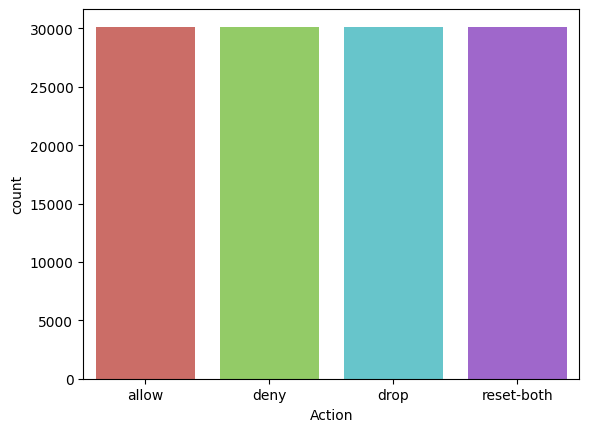

In [6]:
# split x after normalized - for KNN usage
X_train, X_test, y_train, y_test = train_test_split(x_normal, y_resampled,train_size=0.8, test_size=0.2, random_state=42)
sns.countplot(x=y_train,data=df,palette='hls')
plt.show()

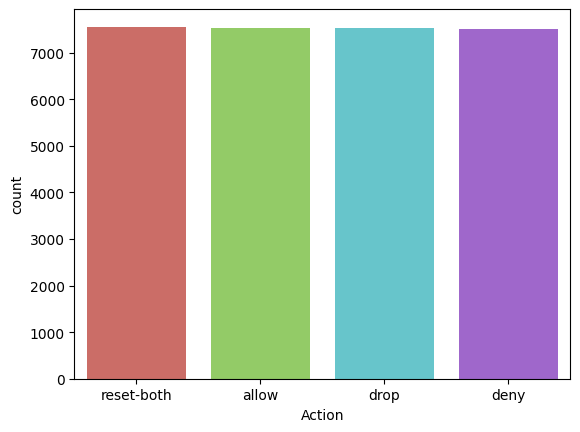

In [7]:
sns.countplot(x=y_test,data=df,palette='hls')
plt.show()

## EDA - data for trees

In [8]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100), max_features=4)
sel.fit(X_resampled, y_resampled)
sel.get_support()
selected_feat= X_resampled.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)
 
X_tree = X_resampled.loc[:,selected_feat]
X_tree
 
X_trainTree, X_testTree, y_trainTree, y_testTree = train_test_split(X_tree, y_resampled,train_size=0.8, test_size=0.2, random_state=42)

4
Index(['Destination Port', 'Bytes', 'Bytes Sent', 'Elapsed Time (sec)'], dtype='object')


# Decision Tree Clasification

In [9]:
# 1) Decision Tree Classification using all 'Default' parameters (gini, best splitter, 2 min sample split, 1 min sample leaf) 

from sklearn.tree import DecisionTreeClassifier                             
classifier_Gini = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
classifier_Gini.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier()

In [10]:
y_predicted_Gini = classifier_Gini.predict(X_testTree) 

In [11]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy Gini:", metrics.accuracy_score(y_testTree, y_predicted_Gini))

Accuracy Gini: 0.989173751328374


In [12]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_Gini})  
data_p

,Actual,Predicted
141903,reset-both,reset-both
33504,allow,allow
11910,allow,deny
103358,drop,drop
140620,reset-both,reset-both
...,...,...
59307,allow,allow
27169,allow,allow
138215,reset-both,reset-both
964,drop,drop


In [13]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_Gini))  
print(classification_report(y_testTree, y_predicted_Gini)) 

[[7523    3    0    0]
 [   0 7333   14  156]
 [   0    0 7528    0]
 [   0  153    0 7402]]
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7526
        deny       0.98      0.98      0.98      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.98      0.98      0.98      7555

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112



In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_Gini, X_trainTree, y_trainTree, cv = 5)
print("Cross validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross validation scores: [0.98709008 0.98750519 0.98775425 0.9875877  0.98746316]
Average cross-validation score: 0.9874800751419933


In [15]:
#from sklearn.tree import export_graphviz
#from six import StringIO
#from IPython.display import Image
#import pydotplus

#features = ['Destination Port','Bytes','Bytes Sent','Elapsed Time (sec)']
#dot_data = StringIO()
#export_graphviz(classifier_Gini, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =features,class_names=['allow','deny','drop','reset-both'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('FirewallLogFile.png')
#Image(graph.create_png())

In [16]:
# 2) Decision Tree Classification using 'entropy' instead of gini (keep best splitter, 2 min sample split, 1 min sample leaf) 

from sklearn.tree import DecisionTreeClassifier      
classifier_entropy = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, ccp_alpha=0.0)
classifier_entropy.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier(criterion='entropy')

In [17]:
y_predicted_entropy = classifier_entropy.predict(X_testTree) 

In [18]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy Entropy:", metrics.accuracy_score(y_testTree, y_predicted_entropy))

Accuracy Entropy: 0.9891405419766206


In [19]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_entropy})  
data_p

,Actual,Predicted
141903,reset-both,reset-both
33504,allow,allow
11910,allow,deny
103358,drop,drop
140620,reset-both,reset-both
...,...,...
59307,allow,allow
27169,allow,allow
138215,reset-both,reset-both
964,drop,drop


In [20]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_entropy))  
print(classification_report(y_testTree, y_predicted_entropy)) 

[[7523    3    0    0]
 [   0 7334   14  155]
 [   0    0 7528    0]
 [   0  155    0 7400]]
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7526
        deny       0.98      0.98      0.98      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.98      0.98      0.98      7555

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112



In [21]:
# 3) Decision Tree Classification using 'log_loss' instead of gini and entropy (keep best splitter, 2 min sample split, 1 min sample leaf) 

from sklearn.tree import DecisionTreeClassifier                             
classifier_logloss = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, ccp_alpha=0.0)
classifier_logloss.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier(criterion='log_loss')

In [22]:
y_predicted_logloss = classifier_logloss.predict(X_testTree) 

In [23]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy Log_loss:", metrics.accuracy_score(y_testTree, y_predicted_logloss))

Accuracy Log_loss: 0.9890741232731137


In [24]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_logloss})  
data_p

,Actual,Predicted
141903,reset-both,reset-both
33504,allow,allow
11910,allow,deny
103358,drop,drop
140620,reset-both,reset-both
...,...,...
59307,allow,allow
27169,allow,allow
138215,reset-both,reset-both
964,drop,drop


In [25]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_logloss))  
print(classification_report(y_testTree, y_predicted_logloss)) 

[[7523    3    0    0]
 [   0 7334   14  155]
 [   0    0 7528    0]
 [   0  157    0 7398]]
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7526
        deny       0.98      0.98      0.98      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.98      0.98      0.98      7555

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112



In [26]:
# 4) Decision Tree Classification using 'random' splitter (gini, 2 min sample split, 1 min sample leaf) 

from sklearn.tree import DecisionTreeClassifier                             
classifier_random = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1, ccp_alpha=0.0)
classifier_random.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier(splitter='random')

In [27]:
y_predicted_random = classifier_entropy.predict(X_testTree) 

In [28]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy random Gini:", metrics.accuracy_score(y_testTree, y_predicted_random))

Accuracy random Gini: 0.9891405419766206


In [29]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_random})  
data_p

,Actual,Predicted
141903,reset-both,reset-both
33504,allow,allow
11910,allow,deny
103358,drop,drop
140620,reset-both,reset-both
...,...,...
59307,allow,allow
27169,allow,allow
138215,reset-both,reset-both
964,drop,drop


In [30]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_random))  
print(classification_report(y_testTree, y_predicted_random)) 

[[7523    3    0    0]
 [   0 7334   14  155]
 [   0    0 7528    0]
 [   0  155    0 7400]]
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7526
        deny       0.98      0.98      0.98      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.98      0.98      0.98      7555

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112



In [31]:
# 5) Decision Tree Classification using 'random' splitter (entropy, 2 min sample split, 1 min sample leaf) 

from sklearn.tree import DecisionTreeClassifier                             
classifier_random2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1, ccp_alpha=0.0)
classifier_random2.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [32]:
y_predicted_random2 = classifier_random2.predict(X_testTree) 

In [33]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy random entropy:", metrics.accuracy_score(y_testTree, y_predicted_random2))

Accuracy random entropy: 0.987413655685441


In [34]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_random2})  
data_p

,Actual,Predicted
141903,reset-both,reset-both
33504,allow,allow
11910,allow,allow
103358,drop,drop
140620,reset-both,reset-both
...,...,...
59307,allow,allow
27169,allow,allow
138215,reset-both,reset-both
964,drop,drop


In [35]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_random2))  
print(classification_report(y_testTree, y_predicted_random2)) 

[[7515    9    0    2]
 [   4 7301   14  184]
 [   0    0 7528    0]
 [   1  165    0 7389]]
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7526
        deny       0.98      0.97      0.97      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.98      0.98      0.98      7555

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112



In [36]:
# 6) Decision Tree Classification using 'random' splitter (log_loss, 2 min sample split, 1 min sample leaf) 

from sklearn.tree import DecisionTreeClassifier                             
classifier_random3 = DecisionTreeClassifier(criterion='log_loss', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1, ccp_alpha=0.0)
classifier_random3.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier(criterion='log_loss', splitter='random')

In [37]:
y_predicted_random3 = classifier_random3.predict(X_testTree) 

In [38]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy random log_loss:", metrics.accuracy_score(y_testTree, y_predicted_random3))

Accuracy random log_loss: 0.9865170031880978


In [39]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_random3})  
data_p

,Actual,Predicted
141903,reset-both,reset-both
33504,allow,allow
11910,allow,allow
103358,drop,drop
140620,reset-both,reset-both
...,...,...
59307,allow,allow
27169,allow,allow
138215,reset-both,reset-both
964,drop,drop


In [40]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_random3))  
print(classification_report(y_testTree, y_predicted_random3)) 

[[7503   15    0    8]
 [   7 7298   14  184]
 [   0    0 7528    0]
 [   1  177    0 7377]]
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7526
        deny       0.97      0.97      0.97      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.97      0.98      0.98      7555

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112



In [41]:
# 7) Decision Tree Classification using all 'Default' parameters and max_depth = 3

from sklearn.tree import DecisionTreeClassifier                             
classifier_Gini3 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth = 3, min_samples_split=2, min_samples_leaf=1, ccp_alpha=0.0)
classifier_Gini3.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier(max_depth=3)

In [42]:
y_predicted_Gini3 = classifier_Gini3.predict(X_testTree) 

In [43]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy Gini (max depth = 3):", metrics.accuracy_score(y_testTree, y_predicted_Gini3))

Accuracy Gini (max depth = 3): 0.9129582890541976


In [44]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_Gini3})  
data_p

,Actual,Predicted
141903,reset-both,reset-both
33504,allow,allow
11910,allow,deny
103358,drop,drop
140620,reset-both,reset-both
...,...,...
59307,allow,allow
27169,allow,allow
138215,reset-both,deny
964,drop,drop


In [45]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_Gini3))  
print(classification_report(y_testTree, y_predicted_Gini3)) 

[[7430   96    0    0]
 [   0 6154   14 1335]
 [   0    0 7528    0]
 [   0 1176    0 6379]]
              precision    recall  f1-score   support

       allow       1.00      0.99      0.99      7526
        deny       0.83      0.82      0.82      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.83      0.84      0.84      7555

    accuracy                           0.91     30112
   macro avg       0.91      0.91      0.91     30112
weighted avg       0.91      0.91      0.91     30112



In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_Gini3, X_trainTree, y_trainTree, cv = 5)
print("Cross validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross validation scores: [0.91100042 0.91203819 0.91411374 0.90846444 0.9158122 ]
Average cross-validation score: 0.9122857972323851


In [47]:
print(X_trainTree)
print(y_trainTree)

        Destination Port  Bytes  Bytes Sent  Elapsed Time (sec)
51228                443   3090        1796                  26
86393              62413     66          66                   0
74127              37965     62          62                   0
24366              57470    145         145                   0
92180                445     68          68                   0
...                  ...    ...         ...                 ...
119879              3389    293         223                   1
103694               445     70          70                   0
131932             31665    144         144                   0
146867              3389    293         223                   0
121958              1134    139         115                   0

[120448 rows x 4 columns]
51228          allow
86393           deny
74127           deny
24366           deny
92180           drop
             ...    
119879    reset-both
103694          drop
131932    reset-both
146867    reset-

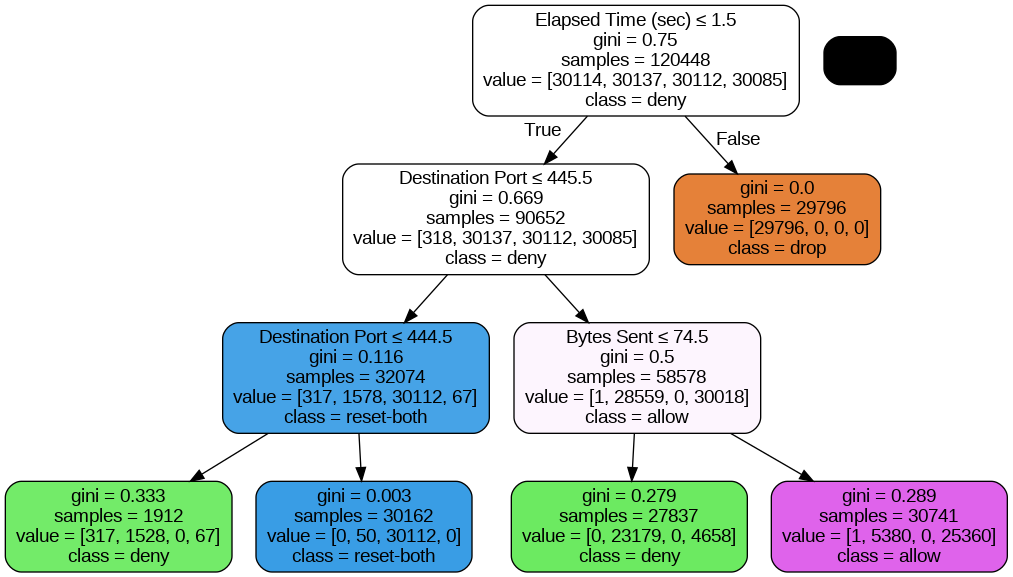

In [48]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

features = ['Destination Port','Bytes','Bytes Sent','Elapsed Time (sec)']
dot_data = StringIO()
export_graphviz(classifier_Gini3, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =features,class_names=['drop','deny','reset-both','allow'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('FirewallLogFile_Gini3.png')
Image(graph.create_png())

In [49]:
# 8) Decision Tree Classification using 'entropy' and max_depth = 3

from sklearn.tree import DecisionTreeClassifier                             
classifier_entropy3 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth = 3, min_samples_split=2, min_samples_leaf=1, ccp_alpha=0.0)
classifier_entropy3.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [50]:
y_predicted_entropy3 = classifier_entropy3.predict(X_testTree) 

In [51]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy Entropy (max depth = 3):", metrics.accuracy_score(y_testTree, y_predicted_entropy3))

Accuracy Entropy (max depth = 3): 0.9127590329436769


In [52]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_entropy3})  
data_p

,Actual,Predicted
141903,reset-both,reset-both
33504,allow,allow
11910,allow,deny
103358,drop,drop
140620,reset-both,reset-both
...,...,...
59307,allow,allow
27169,allow,allow
138215,reset-both,deny
964,drop,drop


In [53]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_entropy3))  
print(classification_report(y_testTree, y_predicted_entropy3)) 

[[7430   96    0    0]
 [   0 5908   14 1581]
 [   0    0 7528    0]
 [   0  936    0 6619]]
              precision    recall  f1-score   support

       allow       1.00      0.99      0.99      7526
        deny       0.85      0.79      0.82      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.81      0.88      0.84      7555

    accuracy                           0.91     30112
   macro avg       0.91      0.91      0.91     30112
weighted avg       0.91      0.91      0.91     30112



In [54]:
print(X_trainTree)
print(y_trainTree)

        Destination Port  Bytes  Bytes Sent  Elapsed Time (sec)
51228                443   3090        1796                  26
86393              62413     66          66                   0
74127              37965     62          62                   0
24366              57470    145         145                   0
92180                445     68          68                   0
...                  ...    ...         ...                 ...
119879              3389    293         223                   1
103694               445     70          70                   0
131932             31665    144         144                   0
146867              3389    293         223                   0
121958              1134    139         115                   0

[120448 rows x 4 columns]
51228          allow
86393           deny
74127           deny
24366           deny
92180           drop
             ...    
119879    reset-both
103694          drop
131932    reset-both
146867    reset-

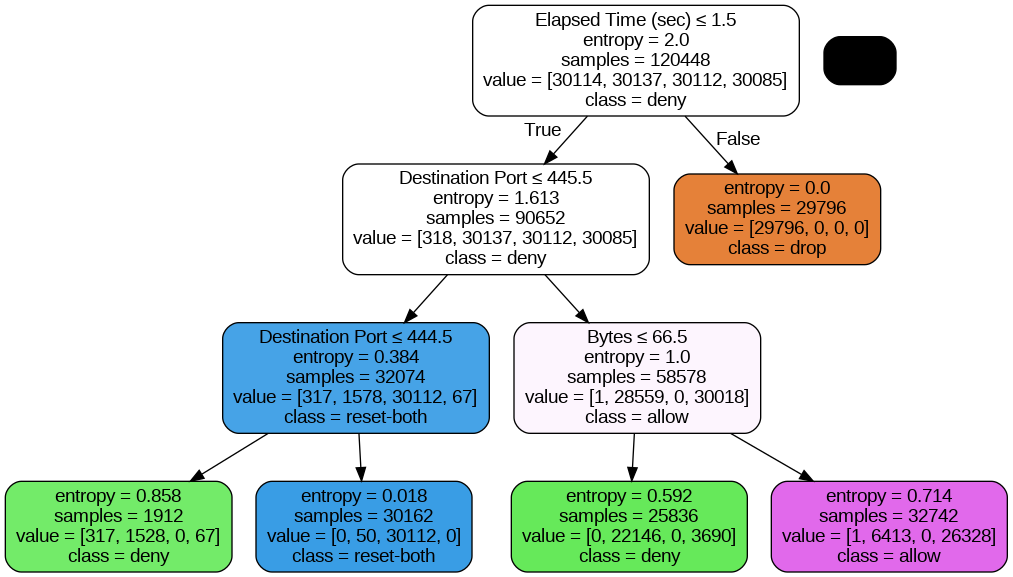

In [55]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

features = ['Destination Port','Bytes','Bytes Sent','Elapsed Time (sec)']
dot_data = StringIO()
export_graphviz(classifier_entropy3, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =features,class_names=['drop','deny','reset-both','allow'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('FirewallLogFile_entropy3.png')
Image(graph.create_png())

In [56]:
# 9) Decision Tree Classification using 'log_loss' and max_depth = 3

from sklearn.tree import DecisionTreeClassifier                             
classifier_logloss3 = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth= 3, min_samples_split=2, min_samples_leaf=1, ccp_alpha=0.0)
classifier_logloss3.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier(criterion='log_loss', max_depth=3)

In [57]:
y_predicted_logloss3 = classifier_logloss3.predict(X_testTree) 

In [58]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy Log_loss (max depth = 3):", metrics.accuracy_score(y_testTree, y_predicted_logloss3))

Accuracy Log_loss (max depth = 3): 0.9127590329436769


In [59]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_logloss3})  
data_p

,Actual,Predicted
141903,reset-both,reset-both
33504,allow,allow
11910,allow,deny
103358,drop,drop
140620,reset-both,reset-both
...,...,...
59307,allow,allow
27169,allow,allow
138215,reset-both,deny
964,drop,drop


In [60]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_logloss3))  
print(classification_report(y_testTree, y_predicted_logloss3)) 

[[7430   96    0    0]
 [   0 5908   14 1581]
 [   0    0 7528    0]
 [   0  936    0 6619]]
              precision    recall  f1-score   support

       allow       1.00      0.99      0.99      7526
        deny       0.85      0.79      0.82      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.81      0.88      0.84      7555

    accuracy                           0.91     30112
   macro avg       0.91      0.91      0.91     30112
weighted avg       0.91      0.91      0.91     30112



In [61]:
print(X_trainTree)
print(y_trainTree)

        Destination Port  Bytes  Bytes Sent  Elapsed Time (sec)
51228                443   3090        1796                  26
86393              62413     66          66                   0
74127              37965     62          62                   0
24366              57470    145         145                   0
92180                445     68          68                   0
...                  ...    ...         ...                 ...
119879              3389    293         223                   1
103694               445     70          70                   0
131932             31665    144         144                   0
146867              3389    293         223                   0
121958              1134    139         115                   0

[120448 rows x 4 columns]
51228          allow
86393           deny
74127           deny
24366           deny
92180           drop
             ...    
119879    reset-both
103694          drop
131932    reset-both
146867    reset-

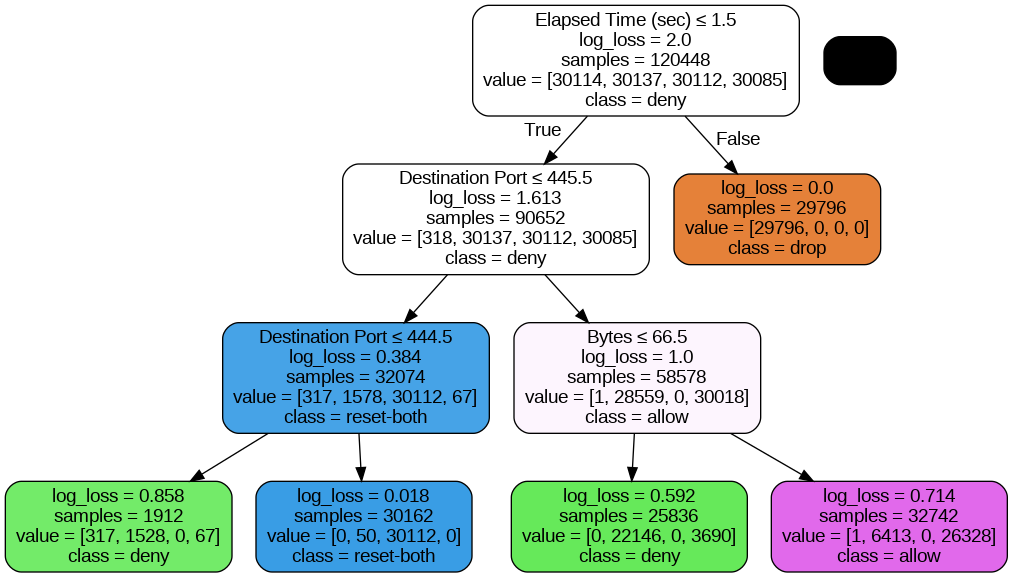

In [62]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

features = ['Destination Port','Bytes','Bytes Sent','Elapsed Time (sec)']
dot_data = StringIO()
export_graphviz(classifier_logloss3, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =features,class_names=['drop','deny','reset-both','allow'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('FirewallLogFile_logloss3.png')
Image(graph.create_png())

In [63]:
# 10) Decision Tree Classification using gini ccp_alpha = 0.0175

from sklearn.tree import DecisionTreeClassifier                             
classifier_Gini = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, ccp_alpha=0.0175, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None)
classifier_Gini.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier(ccp_alpha=0.0175)

In [64]:
y_predicted_Gini = classifier_Gini.predict(X_testTree) 

In [65]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy Gini:", metrics.accuracy_score(y_testTree, y_predicted_Gini))

Accuracy Gini: 0.9384962805526036


In [66]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_Gini})  
data_p

,Actual,Predicted
141903,reset-both,reset-both
33504,allow,allow
11910,allow,deny
103358,drop,drop
140620,reset-both,reset-both
...,...,...
59307,allow,allow
27169,allow,allow
138215,reset-both,reset-both
964,drop,drop


In [67]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_Gini))  
print(classification_report(y_testTree, y_predicted_Gini)) 

[[7430   96    0    0]
 [   0 6061   14 1428]
 [   0    0 7528    0]
 [   0  314    0 7241]]
              precision    recall  f1-score   support

       allow       1.00      0.99      0.99      7526
        deny       0.94      0.81      0.87      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.84      0.96      0.89      7555

    accuracy                           0.94     30112
   macro avg       0.94      0.94      0.94     30112
weighted avg       0.94      0.94      0.94     30112



In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_Gini, X_trainTree, y_trainTree, cv = 5)
print("Cross validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross validation scores: [0.93806559 0.93831465 0.94192611 0.93021711 0.93619494]
Average cross-validation score: 0.9369436812956022


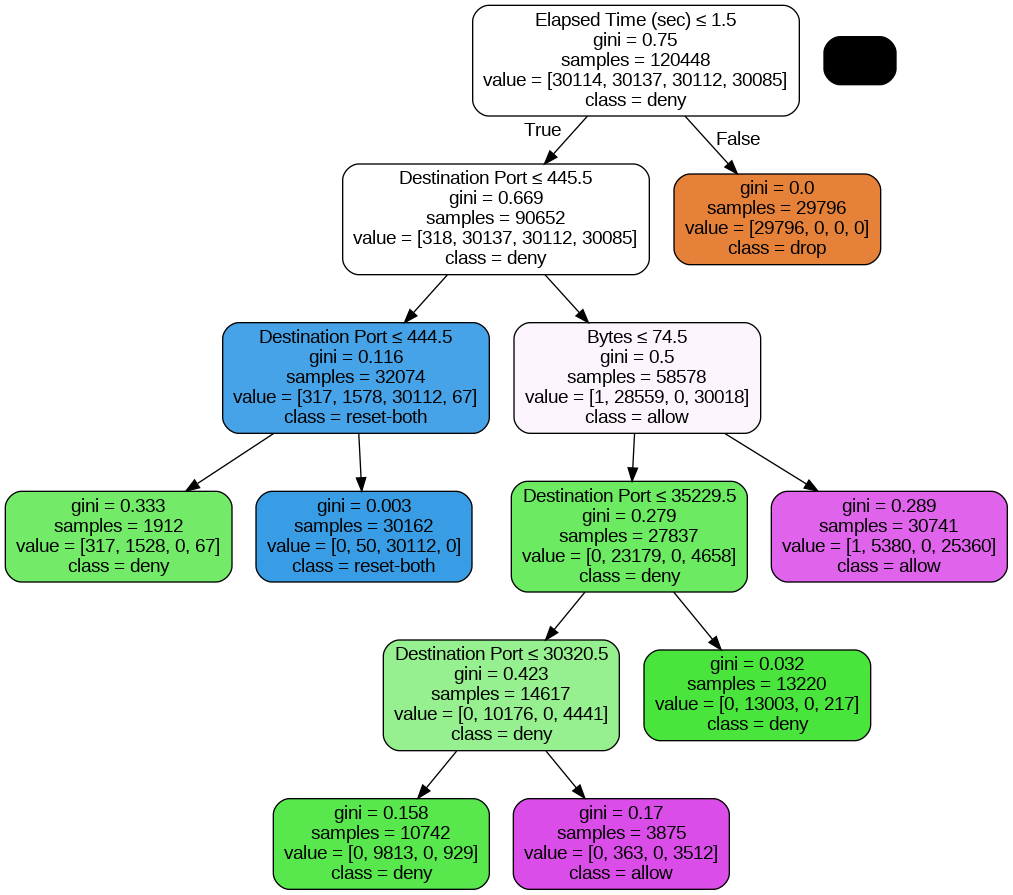

In [69]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

features = ['Destination Port','Bytes','Bytes Sent','Elapsed Time (sec)']
dot_data = StringIO()
export_graphviz(classifier_Gini, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =features,class_names=['drop','deny','reset-both','allow'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('FirewallLogFile_Gini.png')
Image(graph.create_png())

In [70]:
# Use Grid Search for tuning hyperparameters

from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [71]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 4, 5, 10],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter' : ["best", "random"]
}

In [72]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [73]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [74]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.371337,0.013694,0.059357,0.007244,gini,2,5,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.488834,0.491075,0.490868,0.492258,0.490224,0.490652,0.001122,61
1,0.334758,0.015199,0.050221,0.001510,gini,2,5,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.250228,0.250187,0.250187,0.250197,0.250654,0.250291,0.000182,100
2,0.360843,0.012732,0.050546,0.001118,gini,2,10,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.488834,0.491075,0.490868,0.492258,0.490224,0.490652,0.001122,61
3,0.329517,0.014825,0.054854,0.008745,gini,2,10,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.250228,0.250187,0.250187,0.250197,0.250654,0.250291,0.000182,100
4,0.604498,0.114335,0.105774,0.028110,gini,2,20,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.488834,0.491075,0.490868,0.492258,0.490224,0.490652,0.001122,61


In [75]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
40,0.401315,0.032447,0.052468,0.002215,gini,10,5,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.545455,0.544749,0.549523,0.549130,0.549545,0.547680,0.002122,1
90,0.403920,0.011581,0.051058,0.001604,entropy,10,5,best,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.545122,0.544666,0.549481,0.549172,0.549504,0.547589,0.002208,2
140,0.413188,0.031988,0.053370,0.000384,log_loss,10,5,best,"{'criterion': 'log_loss', 'max_depth': 10, 'mi...",0.545122,0.544666,0.549481,0.549172,0.549504,0.547589,0.002208,2
42,0.383296,0.022624,0.056232,0.006891,gini,10,10,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.545081,0.544417,0.549564,0.548964,0.549545,0.547514,0.002278,4
92,0.397342,0.021716,0.061790,0.012737,entropy,10,10,best,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.544956,0.544458,0.549440,0.548840,0.549545,0.547448,0.002256,5


In [76]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [77]:
# 10) Decision Tree Classification using gini, splitter = best, max_depth = 10, min_samples_leaf = 5, ccp_alpha = 0.0175

from sklearn.tree import DecisionTreeClassifier                             
classifier_final = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth = 10, min_samples_split=2, min_samples_leaf= 5, ccp_alpha=0.0175)
classifier_final.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier(ccp_alpha=0.0175, max_depth=10, min_samples_leaf=5)

In [78]:
y_predicted_final = classifier_final.predict(X_testTree) 

In [79]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy after tuning hyperparameters:", metrics.accuracy_score(y_testTree, y_predicted_final))

Accuracy after tuning hyperparameters: 0.9384962805526036


In [80]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_final})  
data_p

,Actual,Predicted
141903,reset-both,reset-both
33504,allow,allow
11910,allow,deny
103358,drop,drop
140620,reset-both,reset-both
...,...,...
59307,allow,allow
27169,allow,allow
138215,reset-both,reset-both
964,drop,drop


In [81]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_final))  
print(classification_report(y_testTree, y_predicted_final)) 

[[7430   96    0    0]
 [   0 6061   14 1428]
 [   0    0 7528    0]
 [   0  314    0 7241]]
              precision    recall  f1-score   support

       allow       1.00      0.99      0.99      7526
        deny       0.94      0.81      0.87      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.84      0.96      0.89      7555

    accuracy                           0.94     30112
   macro avg       0.94      0.94      0.94     30112
weighted avg       0.94      0.94      0.94     30112



In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_final, X_trainTree, y_trainTree, cv = 5)
print("Cross validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross validation scores: [0.93806559 0.93831465 0.94192611 0.93021711 0.93619494]
Average cross-validation score: 0.9369436812956022


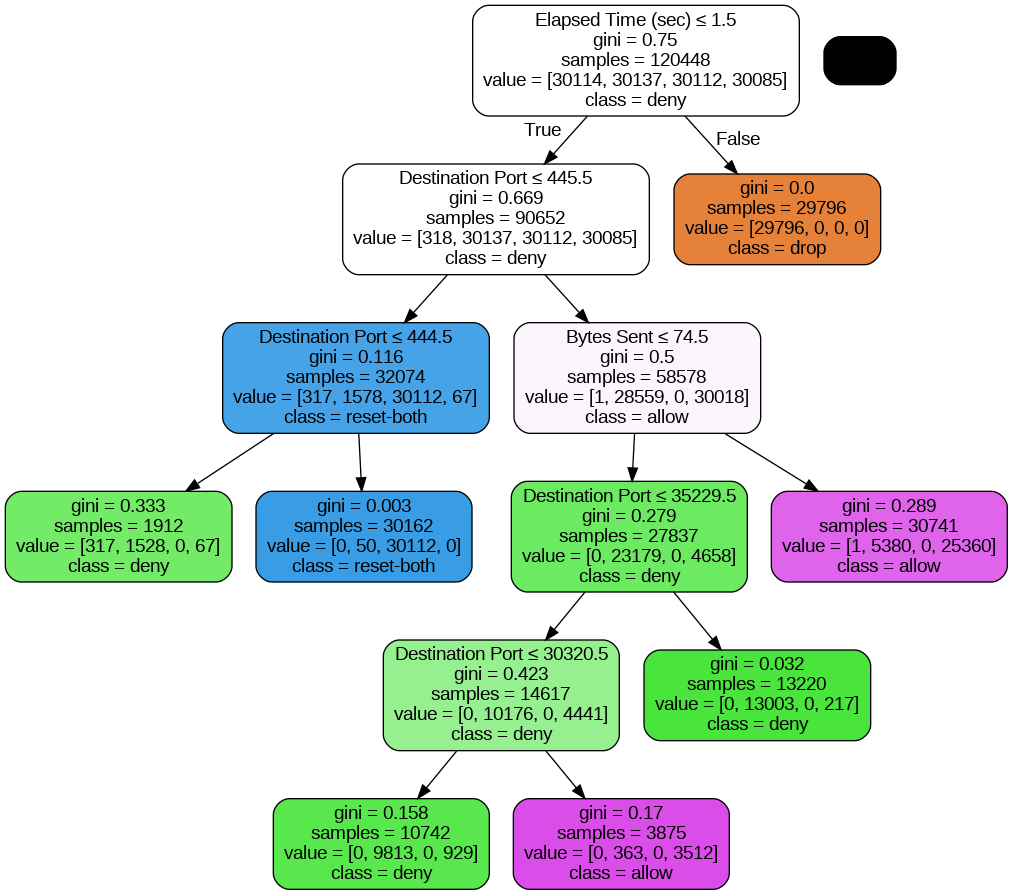

In [83]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

features = ['Destination Port','Bytes','Bytes Sent','Elapsed Time (sec)']
dot_data = StringIO()
export_graphviz(classifier_final, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =features,class_names=['drop','deny','reset-both','allow'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('FirewallLogFile_Gini.png')
Image(graph.create_png())